./1-Obj-Exp 15k/ga_data.pkl


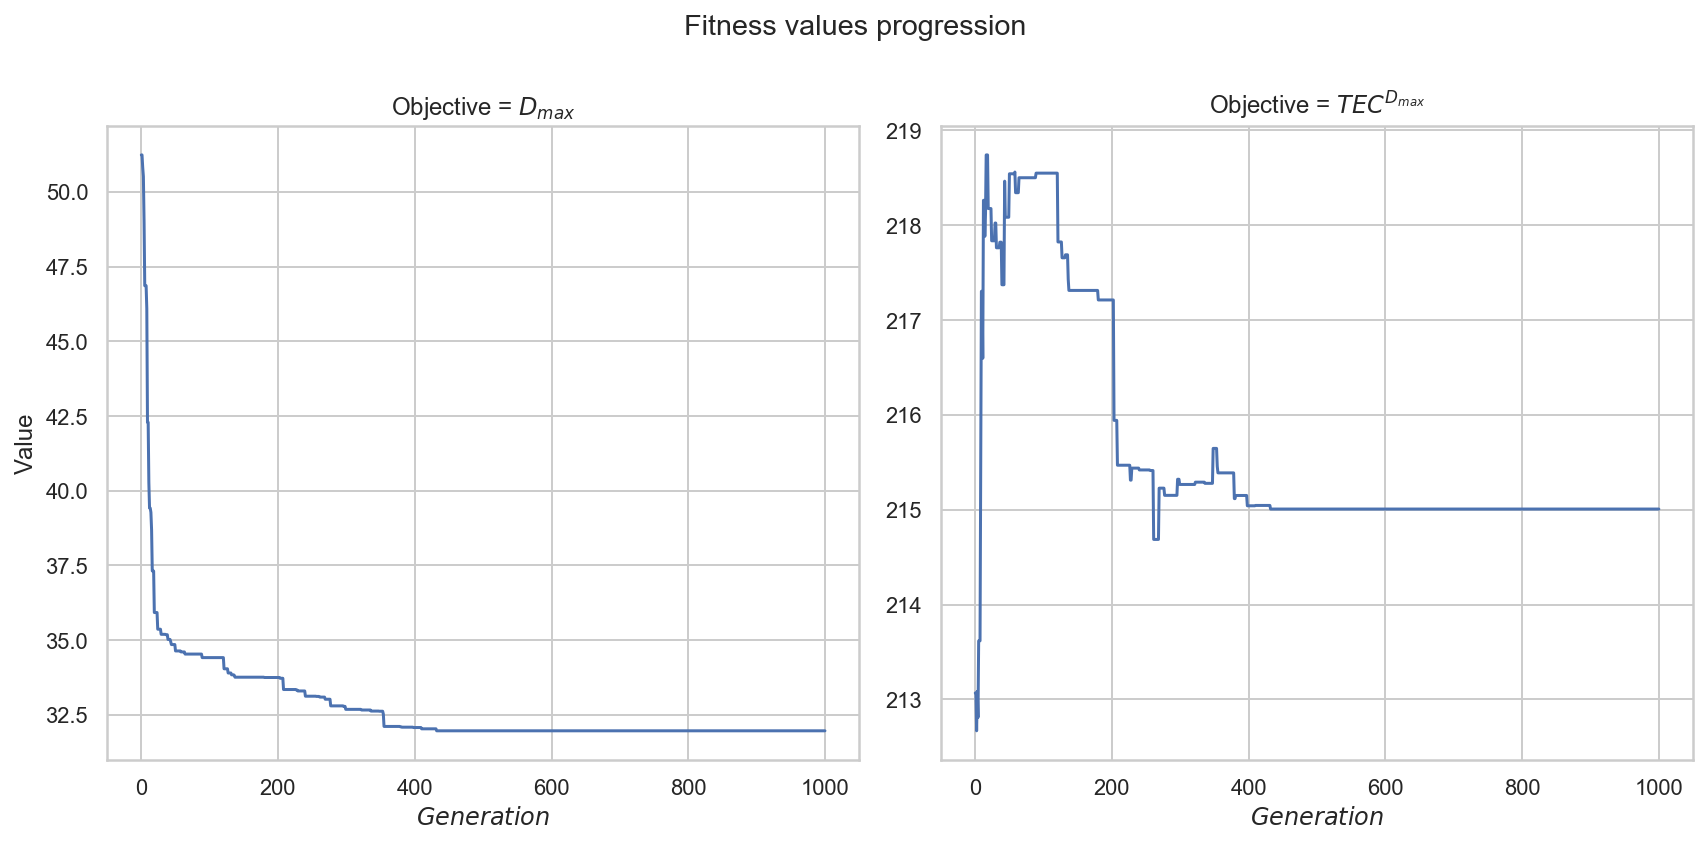

./2-Obj-Exp 15k/ga_data.pkl


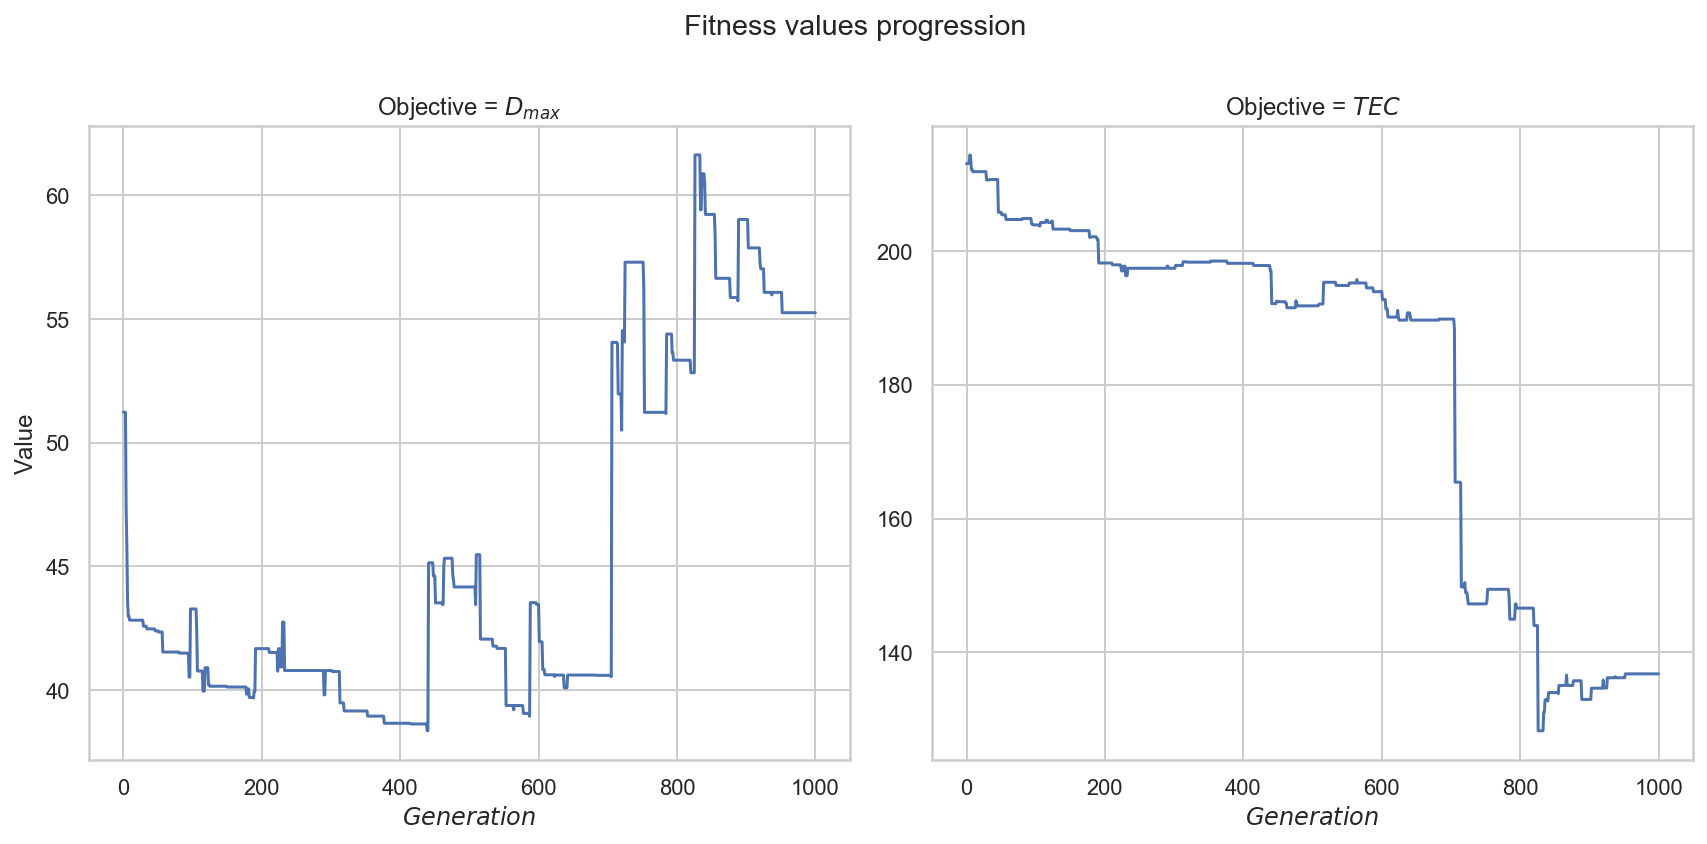

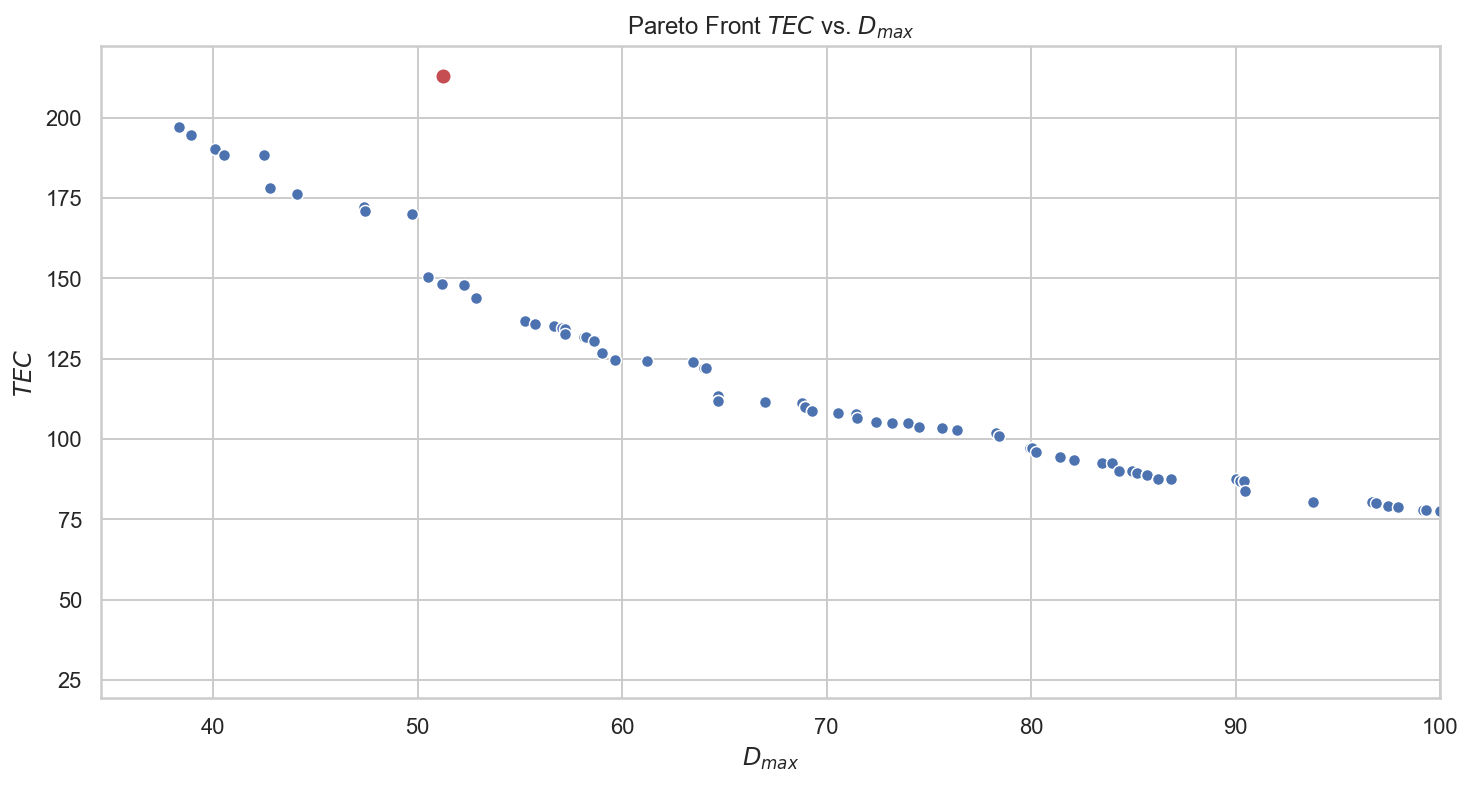

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pickle
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

from deap import creator, base
creator.create("FitnessMin", base.Fitness, weights=(-1,-1,-1))
creator.create("Individual", list, fitness=creator.FitnessMin)

sb.set_context("paper")
sb.set(rc={'figure.figsize': (12, 6.)})
sb.set_style("whitegrid")

OutputFiles = [
#                './1-Obj-Exp/ga_data.pkl',
               './1-Obj-Exp 15k/ga_data.pkl',
#                './2-Obj-Exp/ga_data.pkl',
               './2-Obj-Exp 15k/ga_data.pkl'
                ]

def ShowFigSpine(g):
    for ax in g.axes.flatten(): # Loop directly on the flattened axes 
        for _, spine in ax.spines.items():
            spine.set_visible(True) # You have to first turn them on
#             spine.set_color('black')
#             spine.set_linewidth(4)

def PlotOutputFile(outputfile):
    data = pickle.load(open(outputfile,"rb"))
    logbook = {}
    for k in data['logbook'][0].keys():
        logbook[k] = [x[k].tolist() if hasattr(x[k],'tolist') else x[k] for x in data['logbook']]
        if isinstance(logbook[k][0],(list,tuple)):
            logbook[k] = list(zip(*logbook[k]))
    if outputfile[:3] == './1':
        df = pd.DataFrame({'$Generation$': logbook['gen'], 
                           '$D_{max}$': logbook['best_ind'][0],
                           '$TEC^{D_{max}}$': logbook['best_ind'][1]})
        #                    '$K^{D_{max}}$': logbook['best_ind'][1],
        #                    '$E^{D_{max}}$': logbook['best_ind'][2]})
        dfm = df.melt(id_vars=['$Generation$'],
                     value_vars=['$D_{max}$',
        #                          '$K^{D_{max}}$',
                                 '$TEC^{D_{max}}$'], 
                     var_name='Objective', 
                     value_name='Value')
    else:
        df = pd.DataFrame({'$Generation$': logbook['gen'], 
                           '$D_{max}$': logbook['best_ind'][0],
                           '$TEC$': logbook['best_ind'][1]})
        #                    '$K$': logbook['best_ind'][1],
        #                    '$E$': logbook['best_ind'][2]})
        dfm = df.melt(id_vars=['$Generation$'],
                     value_vars=['$D_{max}$',
        #                          '$K$',
                                 '$TEC$'], 
                     var_name='Objective', 
                     value_name='Value')

    g = sb.FacetGrid(data=dfm, col="Objective",  row=None, sharey=False,height=6)
    g = g.map(plt.plot, "$Generation$", "Value")
    plt.subplots_adjust(top=0.85)
    g.fig.suptitle('Fitness values progression')
    ShowFigSpine(g)
    plt.show()

    nObjectives = data['GA_Parameters']['nObjectives']
    if nObjectives>1:
        HoF = data['ParetoFront']
        df_hof = pd.DataFrame({'$D_{max}$': HoF[0],
                               '$TEC$': HoF[1]})
        #                    '$K}$': logbook['best_ind'][1],
        #                    '$E}$': logbook['best_ind'][2]})
        ax = sb.scatterplot(data=df_hof, x='$D_{max}$',y='$TEC$')
        plt.plot(df.loc[0]['$D_{max}$'],df.loc[0]['$TEC$'],'ro')
        ax.set_title('Pareto Front $TEC$ vs. $D_{max}$')
        m = df_hof['$D_{max}$'].min() *.9
        ax.set_xlim(m,100)
        plt.show()

    
for f in OutputFiles:
    print(f)
    PlotOutputFile(f)

./1-Obj-Exp 15k/ga_data.pkl


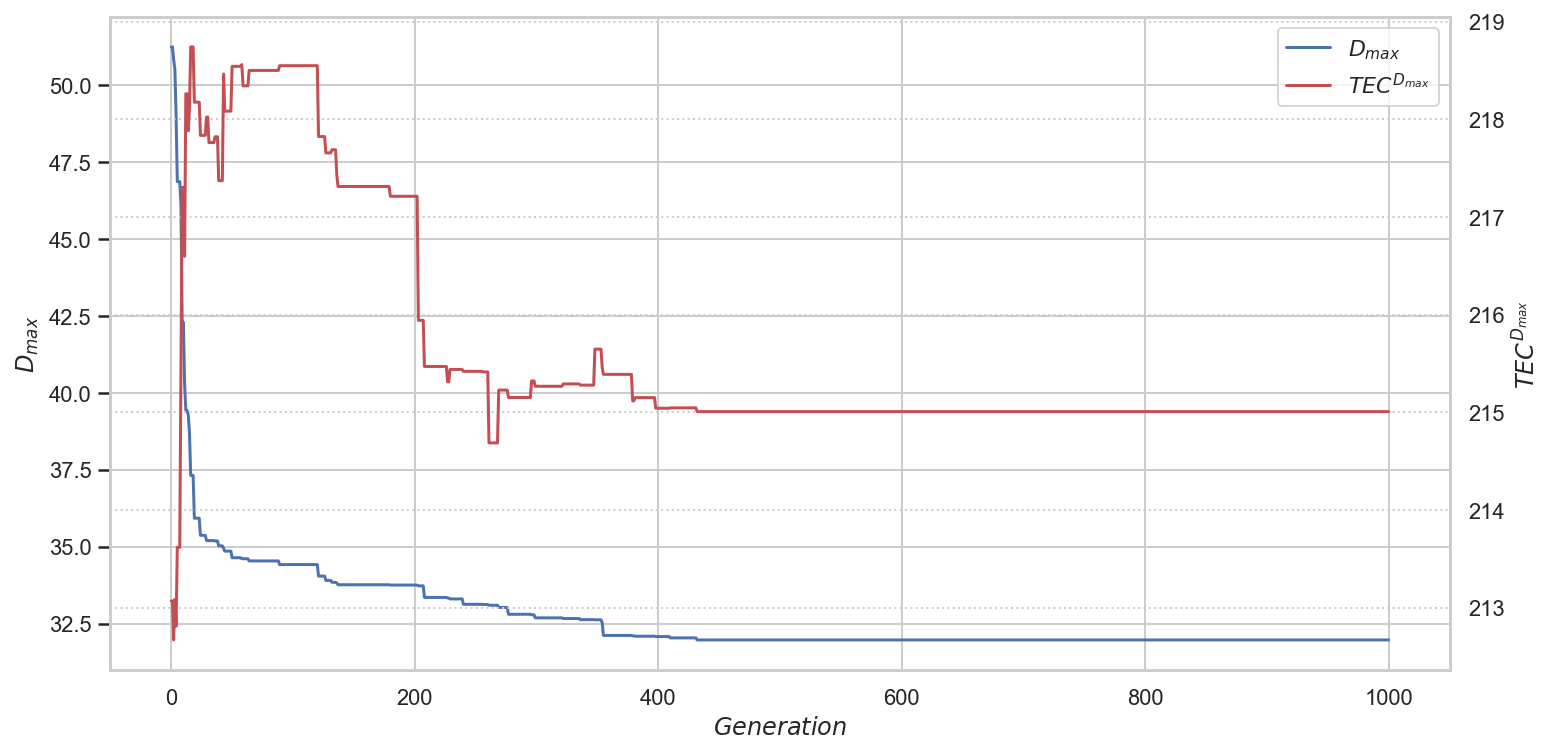

./2-Obj-Exp 15k/ga_data.pkl


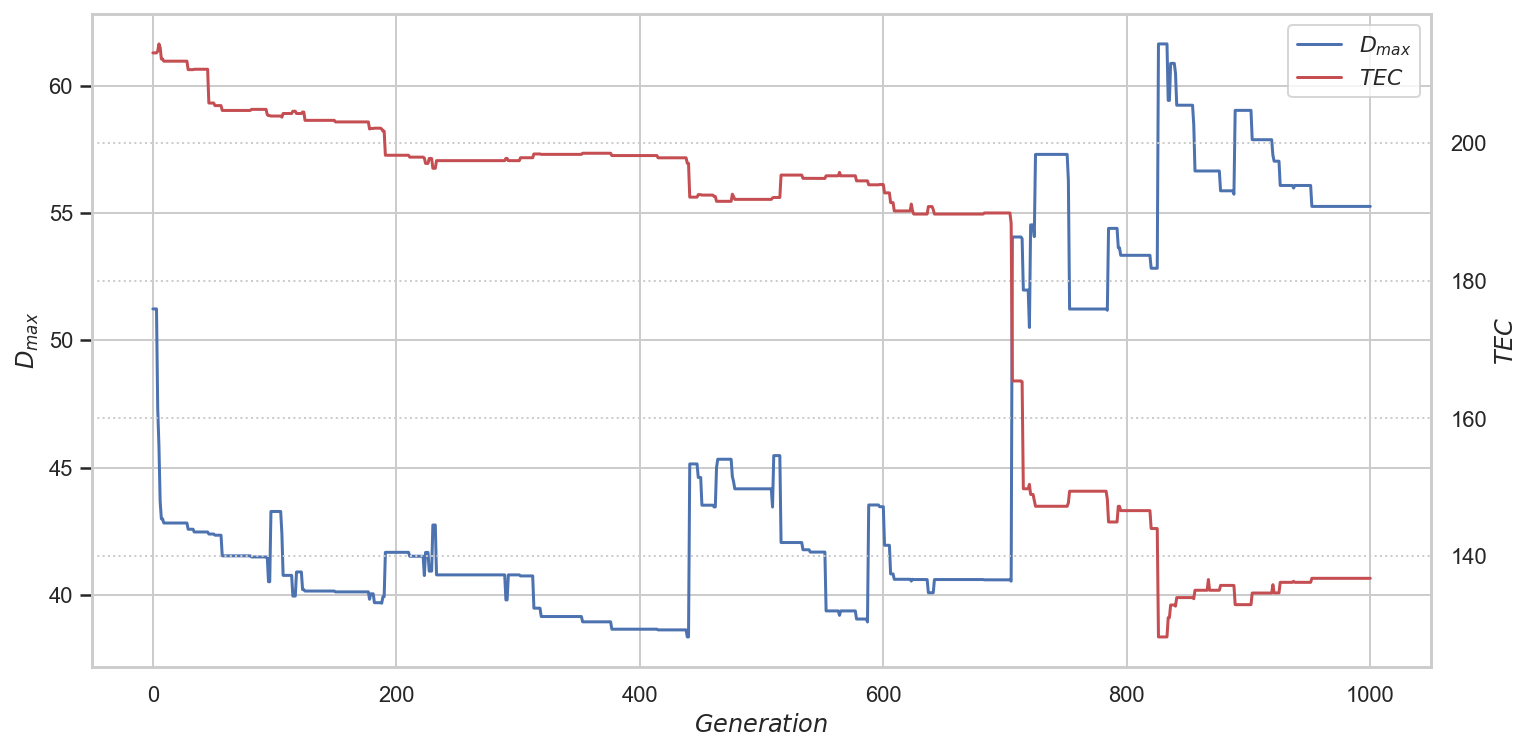

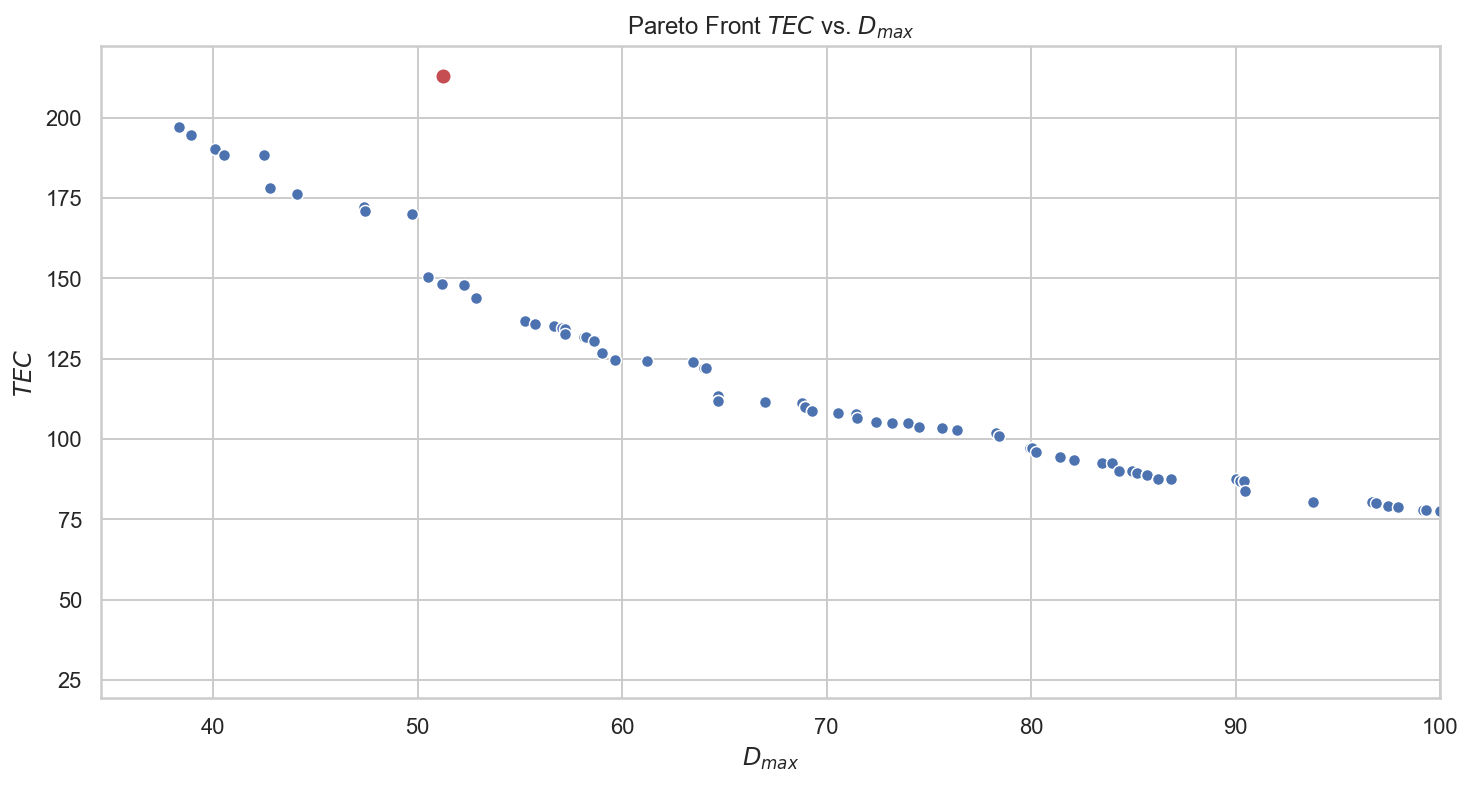

In [49]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pickle
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd

from deap import creator, base
creator.create("FitnessMin", base.Fitness, weights=(-1,-1,-1))
creator.create("Individual", list, fitness=creator.FitnessMin)

sb.set_context("paper")
sb.set(rc={'figure.figsize': (12, 6.)})
sb.set_style("whitegrid")

OutputFiles = [
#                './1-Obj-Exp/ga_data.pkl',
               './1-Obj-Exp 15k/ga_data.pkl',
#                './2-Obj-Exp/ga_data.pkl',
               './2-Obj-Exp 15k/ga_data.pkl'
                ]

def PlotOutputFile(outputfile):
    data = pickle.load(open(outputfile,"rb"))
    logbook = {}
    for k in data['logbook'][0].keys():
        logbook[k] = [x[k].tolist() if hasattr(x[k],'tolist') else x[k] for x in data['logbook']]
        if isinstance(logbook[k][0],(list,tuple)):
            logbook[k] = list(zip(*logbook[k]))
    if outputfile[:3] == './1':
        df = pd.DataFrame({'$Generation$': logbook['gen'], 
                           '$D_{max}$': logbook['best_ind'][0],
                           '$TEC^{D_{max}}$': logbook['best_ind'][1]})
        #                    '$K^{D_{max}}$': logbook['best_ind'][1],
        #                    '$E^{D_{max}}$': logbook['best_ind'][2]})
    else:
        df = pd.DataFrame({'$Generation$': logbook['gen'], 
                           '$D_{max}$': logbook['best_ind'][0],
                           '$TEC$': logbook['best_ind'][1]})
        #                    '$K$': logbook['best_ind'][1],
        #                    '$E$': logbook['best_ind'][2]})

#     ax = sb.lineplot(data=df['$D_{max}$'], color="b", label='$D_{max}$', legend=False)
#     ax.yaxis.set_ticks_position('none')
#     plt.xlabel('$Generation$')
#     plt.ylabel('$D_{max}$')
#     ax2 = plt.twinx()
#     if '$TEC$' in df.columns:
#         y='$TEC$'
#     else:
#         y='$TEC^{D_{max}}$'        
#     ax2 = sb.lineplot(data=df[y], color="r", ax=ax2, label=y, legend=False)
#     ax2.grid(linestyle=':')
#     ax2.yaxis.set_ticks_position('none')
#     plt.ylabel(y)

#     ax.figure.legend(loc='upper right')
#     plt.show()

    fig, ax1 = plt.subplots(figsize=[12,6])
    line1 = ax1.plot(df['$Generation$'], df['$D_{max}$'], "b-", label='$D_{max}$')
    ax1.set_xlabel("$Generation$")
    ax1.set_ylabel('$D_{max}$')
    ax1.xaxis.set_ticks_position('none') 
    ax1.yaxis.set_ticks_position('none') 
    lns = line1

    if '$TEC$' in df.columns:
        y='$TEC$'
    else:
        y='$TEC^{D_{max}}$'        
    ax2 = plt.twinx()
    line2 = ax2.plot(df['$Generation$'], df[y], "r-", label=y)
    ax2.grid(linestyle=':')
    ax2.set_ylabel(y)
    ax2.xaxis.set_ticks_position('none') 
    ax2.yaxis.set_ticks_position('none') 

    lns += line2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns, labs, loc="upper right")
#     plt.title("GA Run Results")
    plt.show()
    
    nObjectives = data['GA_Parameters']['nObjectives']
    if nObjectives>1:
        HoF = data['ParetoFront']
        df_hof = pd.DataFrame({'$D_{max}$': HoF[0],
                               '$TEC$': HoF[1]})
        #                    '$K}$': logbook['best_ind'][1],
        #                    '$E}$': logbook['best_ind'][2]})
        ax = sb.scatterplot(data=df_hof, x='$D_{max}$',y='$TEC$')
        plt.plot(df.loc[0]['$D_{max}$'],df.loc[0]['$TEC$'],'ro')
        ax.set_title('Pareto Front $TEC$ vs. $D_{max}$')
        m = df_hof['$D_{max}$'].min() *.9
        ax.set_xlim(m,100)
        plt.show()

for f in OutputFiles:
    print(f)
    PlotOutputFile(f)